In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stream_df = pd.read_csv("Twitch_game_data.csv", encoding="cp1252")

In [3]:
stream_df.isnull().sum()

Rank                0
Game                1
Month               0
Year                0
Hours_watched       0
Hours_streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

In [4]:
stream_df[stream_df['Game'].isnull()]

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
7561,162,NaN,2,2019,317951,77004,30919,5804,21758,473,114,4.13


In [5]:
stream_df.count()

Rank                17400
Game                17399
Month               17400
Year                17400
Hours_watched       17400
Hours_streamed      17400
Peak_viewers        17400
Peak_channels       17400
Streamers           17400
Avg_viewers         17400
Avg_channels        17400
Avg_viewer_ratio    17400
dtype: int64

In [6]:
top25_df = stream_df[stream_df['Rank'] <= 25]

top25_counts = top25_df['Game'].value_counts()
top25_counts

League of Legends                   87
Dota 2                              87
World of Warcraft                   87
Counter-Strike: Global Offensive    87
Hearthstone                         85
                                    ..
E3 2016                              1
Shattered Skies                      1
Jurassic World Evolution             1
E3 2018                              1
Resident Evil 4                      1
Name: Game, Length: 228, dtype: int64

In [7]:
top25_df['Game'].value_counts().value_counts().head(10)

1     107
2      33
3      15
5       9
7       6
21      4
11      4
87      4
10      3
9       3
Name: Game, dtype: int64

In [8]:
strong_counts = top25_counts[top25_counts > 3]
strong_counts

League of Legends                   87
Dota 2                              87
World of Warcraft                   87
Counter-Strike: Global Offensive    87
Hearthstone                         85
                                    ..
Super Smash Bros. Ultimate           5
New World                            5
NBA 2K16                             5
Diablo III                           4
Virtual Casino                       4
Name: Game, Length: 73, dtype: int64

In [9]:
weak_counts = top25_counts[top25_counts <= 3]
weak_counts

Call of Duty: WWII           3
Final Fantasy XIV Online     3
Super Mario Maker 2          3
Friday the 13th: The Game    3
Always On                    3
                            ..
E3 2016                      1
Shattered Skies              1
Jurassic World Evolution     1
E3 2018                      1
Resident Evil 4              1
Name: Game, Length: 155, dtype: int64

In [10]:
import datetime

In [11]:
strong_df = pd.DataFrame(data=strong_counts.index, columns=['Game'])
#Add on the values of how many months the game is in top 50
strong_df['Count'] = strong_counts.values

#Create a dataFrame for values we want to calculate
totals_df = pd.DataFrame({'Total_hours':[], 'Total_streams':[], 'Last_Month':[]})

# Loop through the strong games dataframe
for index, row in strong_df.iterrows():
    # Get sub dataframe of which hold entries for a specific games
    temp_df = stream_df[stream_df['Game'] == row['Game']]
    #temp varibales for storing totals of a game
    temp_hours, temp_streams, temp_date = 0, 0, datetime.datetime(1,1,1)
    for index2, row2 in temp_df.iterrows():
        temp_hours += row2['Hours_watched']
        temp_streams += row2['Hours_streamed']
        calculated_date = datetime.datetime(row2['Year'], row2['Month'], 1)
        temp_date = calculated_date if calculated_date > temp_date else temp_date
    # Add row of calculations to total dataframe
    totals_df.loc[len(totals_df.index)] = [temp_hours, temp_streams, temp_date]
# Merge the totals_df to the strong_df
strong_df = pd.concat([strong_df, totals_df], axis=1)
strong_df

,Game,Count,Total_hours,Total_streams,Last_Month
0,League of Legends,87,9370061528,183033950,2023-03-01
1,Dota 2,87,3660163488,43133713,2023-03-01
2,World of Warcraft,87,2273732890,74111933,2023-03-01
3,Counter-Strike: Global Offensive,87,4146563160,78468620,2023-03-01
4,Hearthstone,85,2300474896,14681285,2023-03-01
...,...,...,...,...,...
68,Super Smash Bros. Ultimate,5,210525668,5711957,2023-03-01
69,New World,5,261200208,7052430,2023-03-01
70,NBA 2K16,5,26743859,1962530,2017-04-01
71,Diablo III,4,111896973,6083181,2023-03-01


In [24]:
weak_df = pd.DataFrame(data=weak_counts.index, columns=['Game'])
#Add on the values of how many months the game is in top 50
weak_df['Count'] = weak_counts.values

#Create a dataFrame for values we want to calculate
totals_df = pd.DataFrame({'Total_hours':[], 'Total_streams':[], 'Last_Month':[]})
# Loop through the strong games dataframe
for index, row in weak_df.iterrows():
    # Get sub dataframe of which hold entries for a specific games
    temp_df = stream_df[stream_df['Game'] == row['Game']]
    #temp varibales for storing totals of a game
    temp_hours, temp_streams, temp_date = 0, 0, datetime.datetime(1,1,1)
    for index2, row2 in temp_df.iterrows():
        temp_hours += row2['Hours_watched']
        temp_streams += row2['Hours_streamed']
        calculated_date = datetime.datetime(row2['Year'], row2['Month'], 1)
        temp_date = calculated_date if calculated_date > temp_date else temp_date
    # Add row of calculations to total dataframe if last date is not in last collection month
    if(temp_date != datetime.datetime(2023,3,1)):
        totals_df.loc[len(totals_df.index)] = [temp_hours, temp_streams, temp_date]
        
# Merge the totals_df to the strong_df
weak_df = pd.concat([weak_df, totals_df], axis=1)
weak_df = weak_df.dropna(axis=0)
weak_df

,Game,Count,Total_hours,Total_streams,Last_Month
0,Call of Duty: WWII,3,53755020.0,1825893.0,2018-09-01
1,Final Fantasy XIV Online,3,178890054.0,9541195.0,2023-01-01
2,Super Mario Maker 2,3,31734780.0,1341888.0,2021-08-01
3,Friday the 13th: The Game,3,48764089.0,151075.0,2018-12-01
4,Always On,3,234119887.0,6373319.0,2021-12-01
...,...,...,...,...,...
116,Sid Meier's Civilization VI,1,15319933.0,765543.0,2018-12-01
117,Planet Coaster,1,13564832.0,16151.0,2016-06-01
118,Call of Duty: Modern Warfare Remastered,1,3432877.0,48856.0,2016-08-01
119,Call of Duty: Infinite Warfare,1,10853896.0,194233.0,2018-09-01


<BarContainer object of 73 artists>

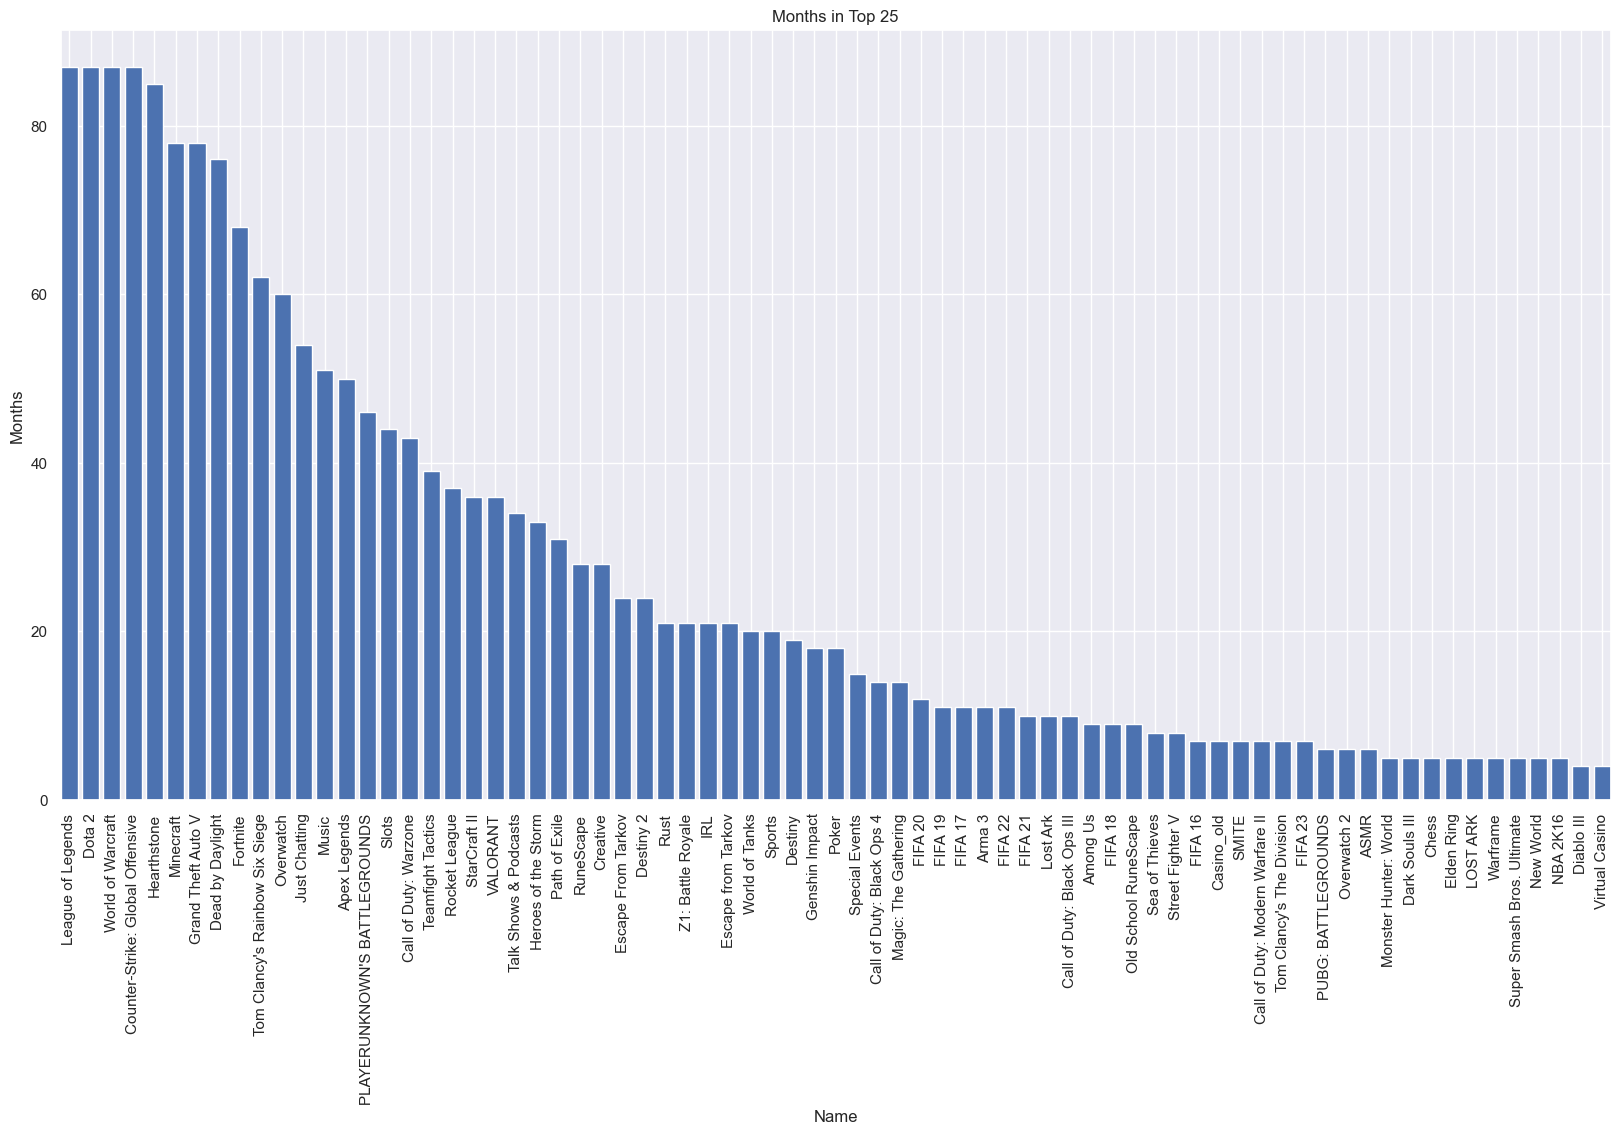

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)
plt.margins(x=0)
ax.set(title="Months in Top 25", xlabel="Name", ylabel="Months")
ax.bar(strong_df['Game'],strong_df['Count'])

<Axes: xlabel='Game', ylabel='Count'>

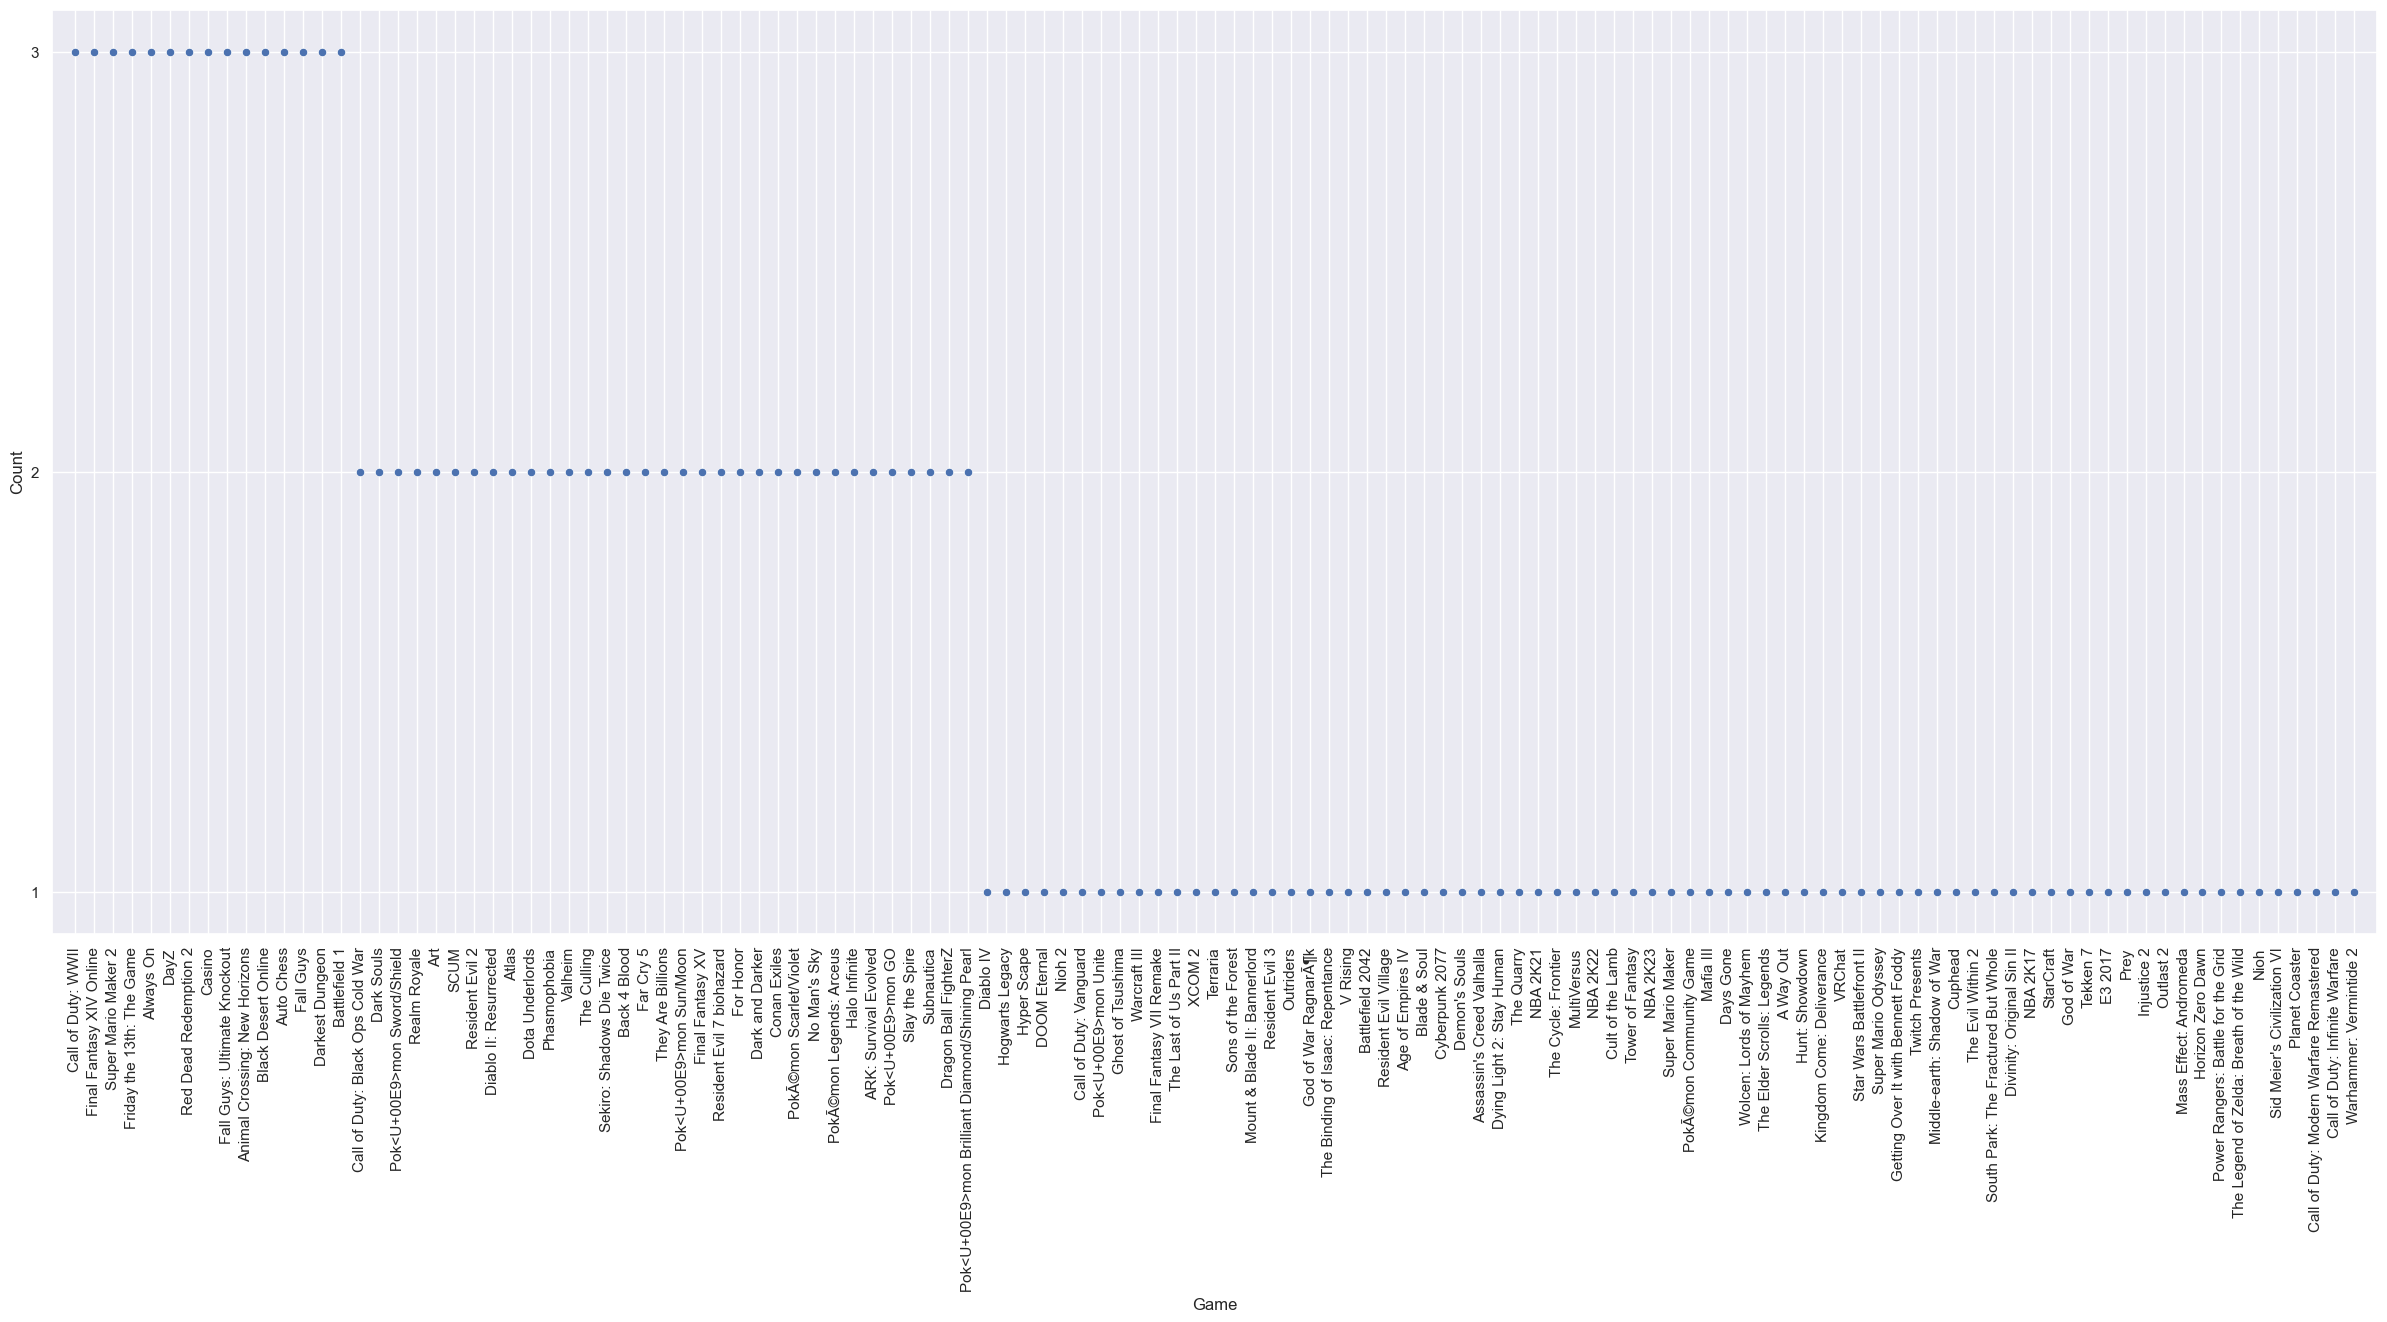

In [32]:
sns.set(rc={"figure.figsize":(30,12)})
plt.margins(x=1/100)
plt.xticks(rotation=90)
plt.yticks(ticks=[1,2,3])
sns.scatterplot(data=weak_df, x='Game', y='Count')

<Axes: xlabel='Hours_streamed', ylabel='Hours_watched'>

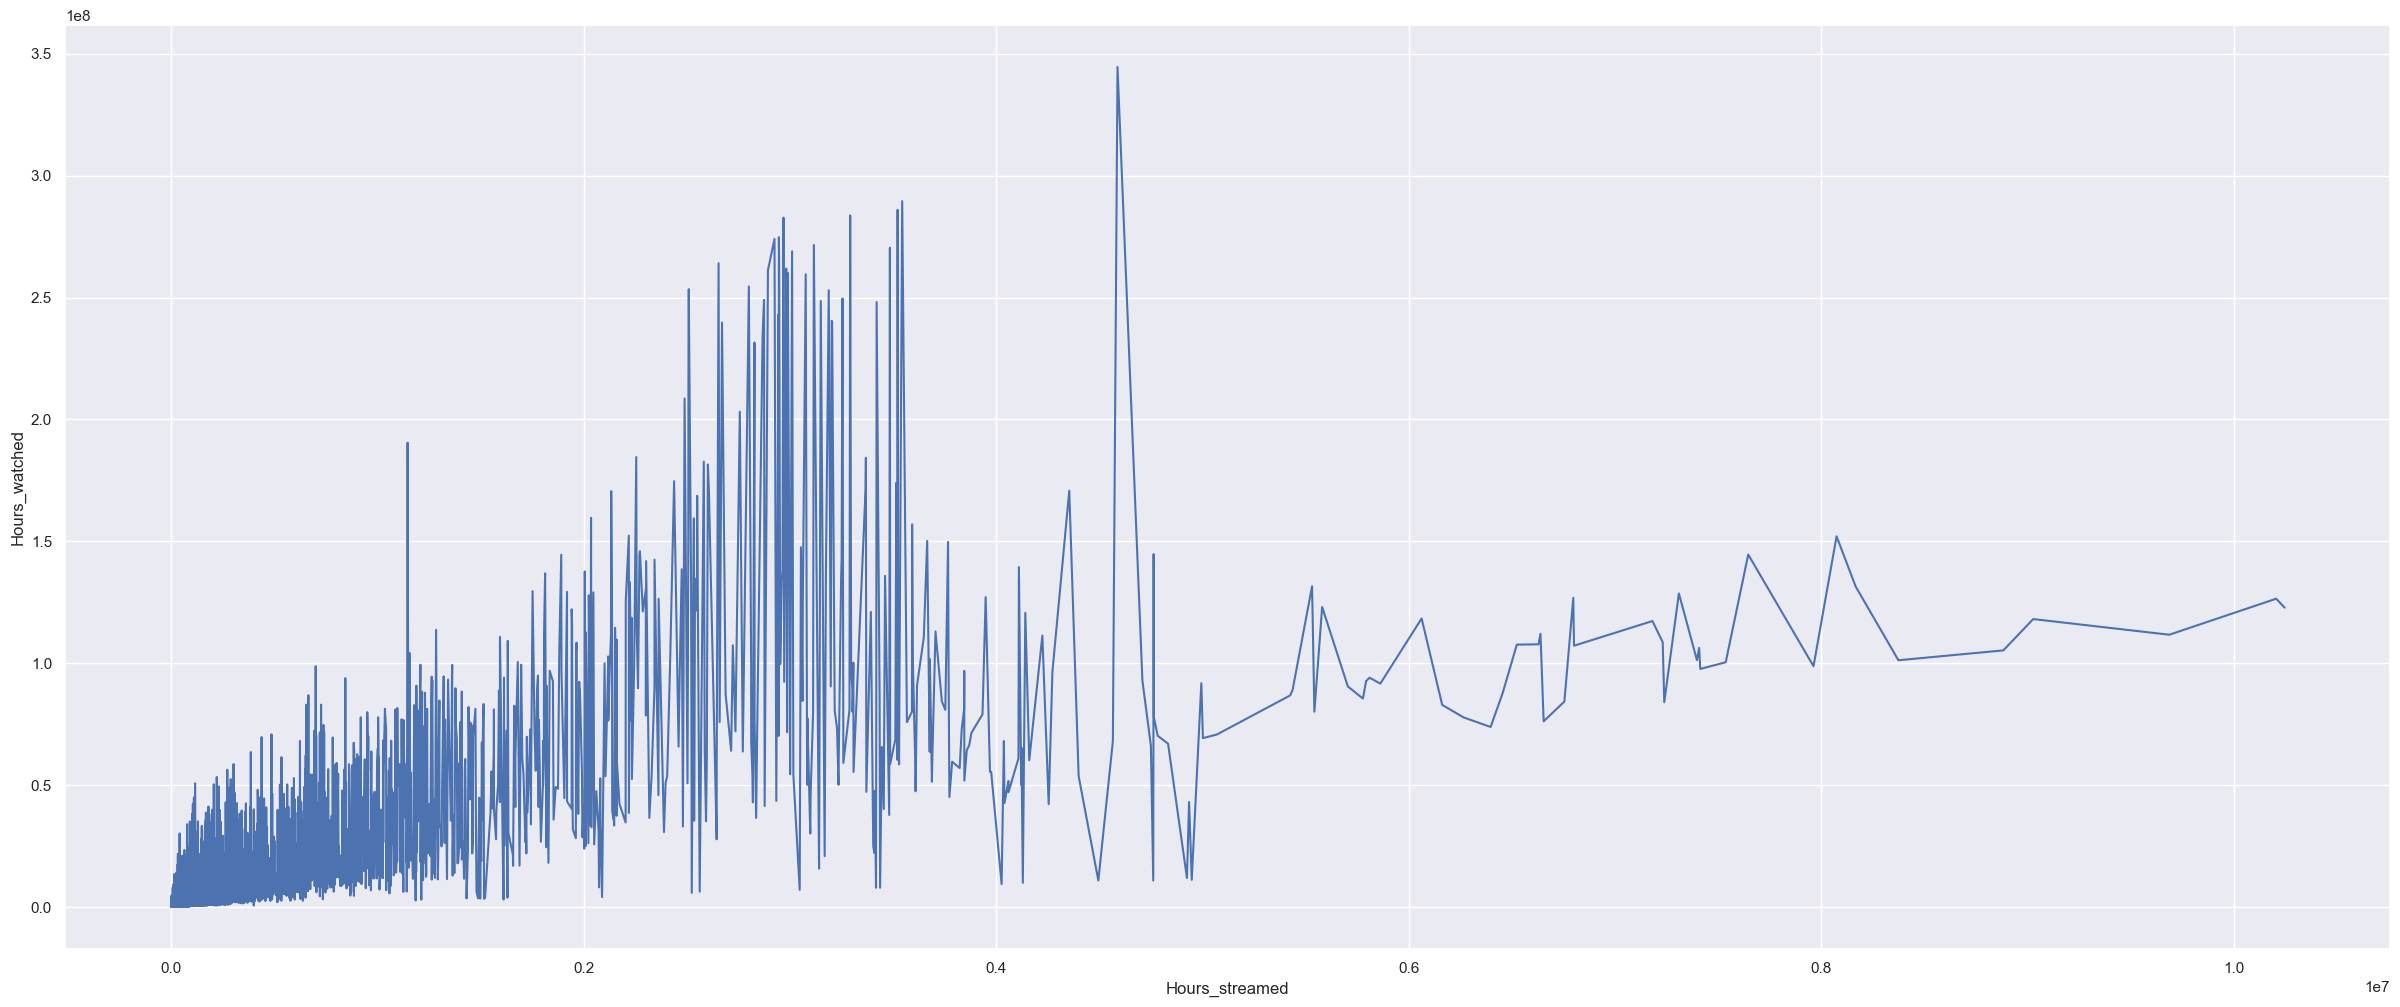

In [45]:
sns.set(rc={"figure.figsize":(30,12)})
sns.lineplot(data=stream_df, x='Hours_streamed', y='Hours_watched')